<a href="https://colab.research.google.com/github/NRavya/deep-learning/blob/main/Vanilla_GAN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

In [13]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image

In [14]:
import numpy as np
import datetime
import os, sys

In [15]:
from matplotlib.pyplot import imshow, imsave
%matplotlib inline

In [16]:
MODEL_NAME = 'VanillaGAN'
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
def get_sample_image(G, n_noise):
    """
        save sample 100 images
    """
    z = torch.randn(100, n_noise).to(DEVICE)
    y_hat = G(z).view(100, 28, 28) # (100, 28, 28)
    result = y_hat.cpu().data.numpy()
    img = np.zeros([280, 280])
    for j in range(10):
        img[j*28:(j+1)*28] = np.concatenate([x for x in result[j*10:(j+1)*10]], axis=-1)
    return img


In [18]:
class Discriminator(nn.Module):
    """
        Simple Discriminator w/ MLP
    """
    def __init__(self, input_size=784, num_classes=1):
        super(Discriminator, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, num_classes),
            nn.Sigmoid(),
        )

    def forward(self, x):
        y_ = x.view(x.size(0), -1)
        y_ = self.layer(y_)
        return y_

In [19]:
class Generator(nn.Module):
    """
        Simple Generator w/ MLP
    """
    def __init__(self, input_size=100, num_classes=784):
        super(Generator, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, num_classes),
            nn.Tanh()
        )

    def forward(self, x):
        y_ = self.layer(x)
        y_ = y_.view(x.size(0), 1, 28, 28)
        return y_

In [20]:
n_noise = 100

In [21]:
D = Discriminator().to(DEVICE)
G = Generator(n_noise).to(DEVICE)

In [22]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5],
                                std=[0.5])]
)

In [23]:
mnist = datasets.MNIST(root='../data/', train=True, transform=transform, download=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 47.7MB/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.54MB/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.5MB/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.44MB/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [24]:
batch_size = 64

In [25]:
data_loader = DataLoader(dataset=mnist, batch_size=batch_size, shuffle=True, drop_last=True)

In [26]:
criterion = nn.BCELoss()
D_opt = torch.optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))
G_opt = torch.optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [27]:
max_epoch = 25
step = 0
n_critic = 1

In [28]:
D_labels = torch.ones(batch_size, 1).to(DEVICE) # Discriminator Label to real
D_fakes = torch.zeros(batch_size, 1).to(DEVICE)

In [29]:
if not os.path.exists('samples'):
    os.makedirs('samples')

Epoch: 0/25, Step: 23500, D Loss: 1.1988046169281006, G Loss: 0.9027533531188965
Epoch: 0/25, Step: 24000, D Loss: 1.3413214683532715, G Loss: 0.7421829700469971
Epoch: 1/25, Step: 24500, D Loss: 1.2165439128875732, G Loss: 0.9858688116073608
Epoch: 1/25, Step: 25000, D Loss: 1.32808518409729, G Loss: 0.7104686498641968
Epoch: 2/25, Step: 25500, D Loss: 1.2947430610656738, G Loss: 0.8760136365890503
Epoch: 2/25, Step: 26000, D Loss: 1.2263569831848145, G Loss: 0.6403757929801941
Epoch: 3/25, Step: 26500, D Loss: 1.3028724193572998, G Loss: 0.723132848739624
Epoch: 3/25, Step: 27000, D Loss: 1.2889373302459717, G Loss: 0.808806836605072
Epoch: 4/25, Step: 27500, D Loss: 1.1910200119018555, G Loss: 1.0590367317199707
Epoch: 4/25, Step: 28000, D Loss: 1.2067629098892212, G Loss: 0.8792616724967957
Epoch: 5/25, Step: 28500, D Loss: 1.2576212882995605, G Loss: 0.9292056560516357
Epoch: 5/25, Step: 29000, D Loss: 1.2718995809555054, G Loss: 0.9516510367393494
Epoch: 6/25, Step: 29500, D Loss

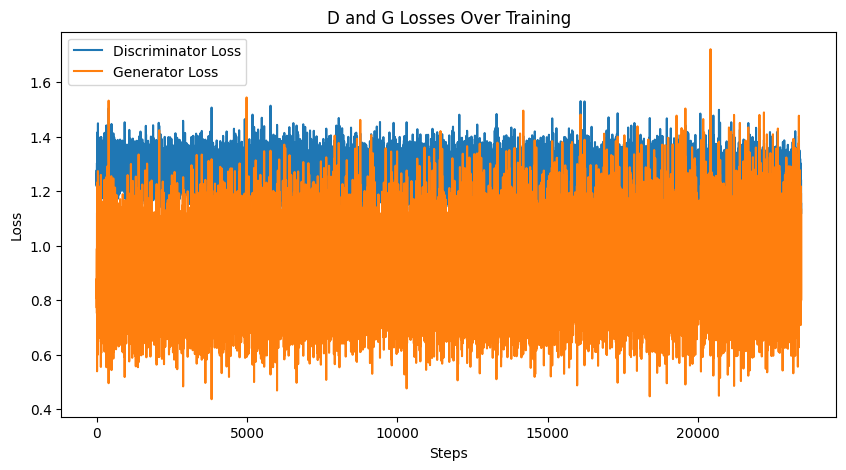

In [33]:
import matplotlib.pyplot as plt

# Initialize lists to store losses
D_losses = []
G_losses = []

for epoch in range(max_epoch):
    for idx, (images, _) in enumerate(data_loader):
        # Training Discriminator
        x = images.to(DEVICE)
        x_outputs = D(x)
        D_x_loss = criterion(x_outputs, D_labels)

        z = torch.randn(batch_size, n_noise).to(DEVICE)
        z_outputs = D(G(z))
        D_z_loss = criterion(z_outputs, D_fakes)
        D_loss = D_x_loss + D_z_loss

        D.zero_grad()
        D_loss.backward()
        D_opt.step()

        if step % n_critic == 0:
            # Training Generator
            z = torch.randn(batch_size, n_noise).to(DEVICE)
            z_outputs = D(G(z))
            G_loss = criterion(z_outputs, D_labels)

            G.zero_grad()
            G_loss.backward()
            G_opt.step()

        # Store losses for plotting
        D_losses.append(D_loss.item())
        G_losses.append(G_loss.item())

        if step % 500 == 0:
            print('Epoch: {}/{}, Step: {}, D Loss: {}, G Loss: {}'.format(epoch, max_epoch, step, D_loss.item(), G_loss.item()))

        if step % 1000 == 0:
            G.eval()
            img = get_sample_image(G, n_noise)
            imsave('samples/{}_step{}.jpg'.format(MODEL_NAME, str(step).zfill(3)), img, cmap='gray')
            G.train()
        step += 1

# After training, plot the losses
plt.figure(figsize=(10, 5))
plt.plot(D_losses, label='Discriminator Loss')
plt.plot(G_losses, label='Generator Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('D and G Losses Over Training')
plt.legend()
plt.show()


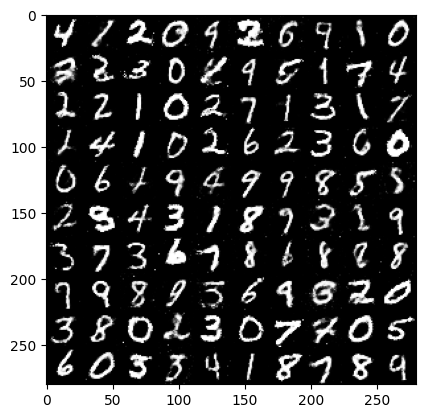

In [34]:
G.eval()
imshow(get_sample_image(G, n_noise), cmap='gray')

In [36]:
torch.save(D.state_dict(), 'D.pkl')
torch.save(G.state_dict(), 'G.pkl')